# Section 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import word_tokenize,regexp_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('./combined3.csv')

In [3]:
df.shape

(1506, 4)

<b> Data Scientist </b> will be assigned class 1 <br>
<b> Data Analyst </b> will be assigned class 2 <br>
<b> Business Intelligence /  Business Analyst </b> will be assigned class 3 <br>
<b> Others </b> will be assigned 0

In [6]:
def title_class(x):
    if 'scientist' in x.lower():
        return 1
    elif 'analyst' in x.lower() and 'business' not in x.lower():
        return 2
    elif 'business intelligence' in x.lower() or ('analyst' in x.lower() and 'business' in x.lower()):
        return 3
    else:
        return 0

In [7]:
df['title_class'] = df['job_title'].apply(title_class)

Cleaning Salary Data.
Convert to numeric, otherwise Nan if error

In [8]:
df['salary'] = pd.to_numeric(df['salary'],errors='coerce')

In [9]:
df.drop_duplicates(subset = 'job_description',inplace = True)

In [10]:
df.shape

(1415, 5)

## Senior classing

In [11]:
senior_list = ['vp','president','senior']

In [12]:
def senior_class(x):
    if any(elem in x.lower() for elem in senior_list):
        return 1
    else:
        return 0

In [13]:
df['senior'] = df['job_title'].apply(senior_class)

In [14]:
df.head()

,job_title,job_description,salary,company,title_class,senior
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000.0,United Overseas Bank,3,1
1,Data Architect,An exciting Data Architect role has just bec...,15000.0,Robert Walters (Singapore) Pte Ltd,0,0
2,Data Analyst,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,2,0
3,Data Architect,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,0,0
4,Data Manager,"This role reports to the project lead, Retai...",4500.0,Standard Chartered Bank Singapore,0,0


In [15]:
df['title_class'].value_counts().sum()

1415

## Cleaning Null Salary and banding salary range into classes

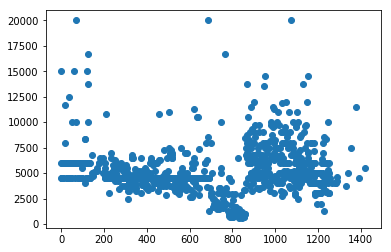

In [17]:
plt.scatter(y=df['salary'],x = df.index)

In [18]:
## Dropping null salary

df.dropna(subset=['salary'],inplace=True)

In [19]:
df.reset_index(inplace=True,drop = True)

In [20]:
df['salary'].describe()

count     1071.000000
mean      5125.706816
std       2318.702247
min        600.000000
25%       4500.000000
50%       4500.000000
75%       6000.000000
max      20000.000000
Name: salary, dtype: float64

In [21]:
df['salary'].median()

4500.0

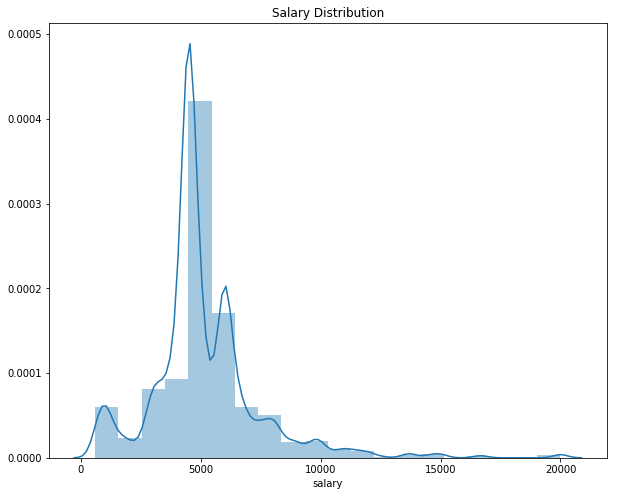

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(df['salary'],bins=20,)
plt.title('Salary Distribution')
plt.show()

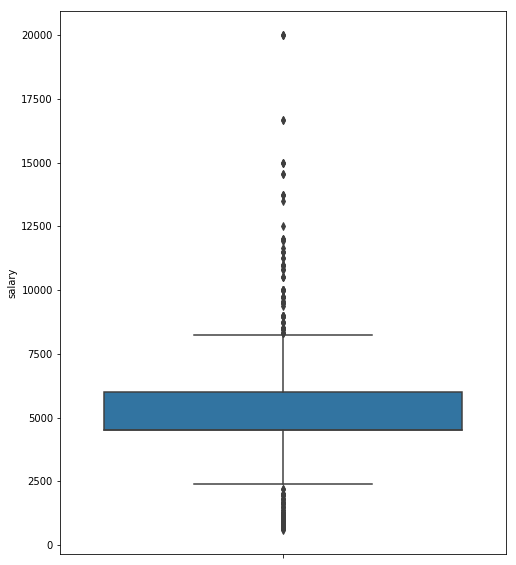

In [23]:
plt.figure(figsize=(8,10))
sns.boxplot(df['salary'],orient='v')

Salary Banding <br>
class 1 : 2500 and below <br>
class 2 : 2501 - 5000<br>
class 3 : 5001 - 7500<br>



In [124]:
df['salary'].describe()

count     1071.000000
mean      5125.706816
std       2318.702247
min        600.000000
25%       4500.000000
50%       4500.000000
75%       6000.000000
max      20000.000000
Name: salary, dtype: float64

In [125]:
def band_salary(x):
    if x < 4500:
        return 1
    elif 4500<=x<=6000:
        return 2
    elif 6000<x:
        return 3

In [126]:
df['salary_band'] = df['salary'].apply(band_salary)

In [127]:
df['salary_band'].value_counts()

2    602
1    267
3    202
Name: salary_band, dtype: int64

In [128]:
df['salary_band'].value_counts()/len(df['salary_band'])

2    0.562092
1    0.249300
3    0.188609
Name: salary_band, dtype: float64

# <font color = 'green'>A: Predicting the salary band class based on job description, seniority and job_title</font>

## Running nltk/tokenizer etc

In [29]:
## Remove punctuations
import re

df['job_description'] = df['job_description'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())

In [30]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t,pos = 'v') for t in word_tokenize(articles)]

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = 'english',
                       lowercase = True,
                       token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                       max_df = 0.5,
                       min_df = 10)


In [31]:
tf_vectorizer.fit_transform(df['job_description'])

<1071x1993 sparse matrix of type '<type 'numpy.int64'>'
	with 118868 stored elements in Compressed Sparse Row format>

In [32]:
df_2 = pd.DataFrame(tf_vectorizer.fit_transform(df['job_description']).todense(),columns = tf_vectorizer.get_feature_names())

In [33]:
df_2.shape

(1071, 1993)

In [34]:
df_2.head()

,+,ab,abap,abilities,ability,able,abreast,academic,accelerate,acceptance,...,wynn,x,xml,yao,yarn,year,yearly,yield,youll,zone
0,0,0,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_2['title_class'] = df['title_class'].astype('int')
df_2['senior_class'] = df['senior'].astype('int')
df_2['salary_band'] = df['salary_band'].astype('int')

In [130]:
df_2.head()

,+,ab,abap,abilities,ability,able,abreast,academic,accelerate,acceptance,...,yao,yarn,year,yearly,yield,youll,zone,title_class,senior_class,salary_band
0,0,0,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,3,1,2
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
3,2,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Running a logistic regression

In [131]:
## Selecting predictor/target

X = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1]

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [133]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,stratify = y, random_state = 42,test_size = 0.33)

In [134]:
y_train.shape

(717L,)

In [135]:
y_train.value_counts().sort_index()/len(y_train)

1    0.249651
2    0.562064
3    0.188285
Name: salary_band, dtype: float64

In [137]:
## Carrying out upsampling on training set to solve problem of imbalance class

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42,ratio=1.0)
X_train_res, y_train_res = ros.fit_sample(X_train,y_train)

C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [138]:
pd.Series(y_train_res).value_counts()

3    403
2    403
1    403
dtype: int64

In [139]:
clf = LogisticRegression()
model = clf.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6807909604519774

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
## Checking the result for the above

print pd.DataFrame(confusion_matrix(y_test,y_pred),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred)

        pred_1  pred_2  pred_3
true_1      51      32       5
true_2      23     151      25
true_3       7      21      39
             precision    recall  f1-score   support

          1       0.63      0.58      0.60        88
          2       0.74      0.76      0.75       199
          3       0.57      0.58      0.57        67

avg / total       0.68      0.68      0.68       354



### Attempt to grid search

In [144]:
from sklearn.grid_search import GridSearchCV

In [145]:
clf = LogisticRegression()
parameters = {'C':[1.0,0.1,0.01],'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

clf_gs = GridSearchCV(clf,parameters)
clf_gs.fit(X_train_res,y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 0.1, 0.01], 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [146]:
clf_gs.best_params_

{'C': 1.0, 'solver': 'newton-cg'}

In [147]:
clf_gs.best_score_

0.847808105872622

In [148]:
y_pred_gs = clf_gs.predict(X_test)

In [150]:
## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred_gs),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred_gs)

        pred_1  pred_2  pred_3
true_1      54      30       4
true_2      24     150      25
true_3       6      23      38
             precision    recall  f1-score   support

          1       0.64      0.61      0.63        88
          2       0.74      0.75      0.75       199
          3       0.57      0.57      0.57        67

avg / total       0.68      0.68      0.68       354



## Attempt SVM

In [151]:
from sklearn.svm import SVC

In [152]:
svm = SVC(random_state =42)
model = svm.fit(X_train_res,y_train_res)

In [153]:
y_pred = model.predict(X_test)

In [155]:
## Checking the result for the above

print pd.DataFrame(confusion_matrix(y_test,y_pred),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred)

        pred_1  pred_2  pred_3
true_1      59      19      10
true_2      64     100      35
true_3      14      18      35
             precision    recall  f1-score   support

          1       0.43      0.67      0.52        88
          2       0.73      0.50      0.60       199
          3       0.44      0.52      0.48        67

avg / total       0.60      0.55      0.56       354



## Attempt to grid search

In [156]:
parameters = {'C':[1.0,0.1,0.01],'kernel':['rbf','linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4],'random_state':[42]}

svc_gs =  GridSearchCV(svm,parameters)
svc_gs.fit(X_train_res,y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid'], 'C': [1.0, 0.1, 0.01], 'random_state': [42], 'degree': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [157]:
svc_gs.best_params_

{'C': 0.1, 'degree': 3, 'kernel': 'linear', 'random_state': 42}

In [158]:
svc_gs.best_score_

0.8329197684036393

In [159]:
y_pred_gs = svc_gs.predict(X_test)

In [160]:
## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred_gs),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred_gs)

        pred_1  pred_2  pred_3
true_1      53      32       3
true_2      31     143      25
true_3      10      21      36
             precision    recall  f1-score   support

          1       0.56      0.60      0.58        88
          2       0.73      0.72      0.72       199
          3       0.56      0.54      0.55        67

avg / total       0.66      0.66      0.66       354



-------